In [1]:
from google.colab import files
uploaded = files.upload()


Saving crimes_against_women_2001-2014.csv to crimes_against_women_2001-2014.csv


In [2]:
import pandas as pd
data = pd.read_csv('crimes_against_women_2001-2014.csv')
data.head()


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [3]:
#DATA PRE PROCESSING
# View basic information about the data
data.info()

# Check for missing values
data.isnull().sum()

# Basic statistics of numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [4]:
# Fill missing values with 0
data.fillna(0, inplace=True)


In [5]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0'], inplace=True)

# Rename columns for easier access if needed
data.rename(columns={'Kidnapping and Abduction': 'Kidnapping_Abduction'}, inplace=True)


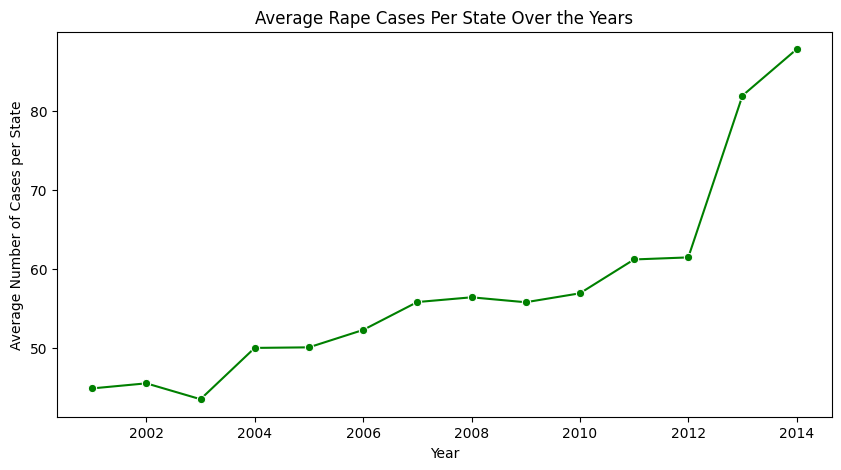

In [6]:
#DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average number of cases per state per year
average_cases_per_year = data.groupby('Year')['Rape'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_cases_per_year, x="Year", y="Rape", marker='o', color='green')
plt.title("Average Rape Cases Per State Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Number of Cases per State")
plt.show()


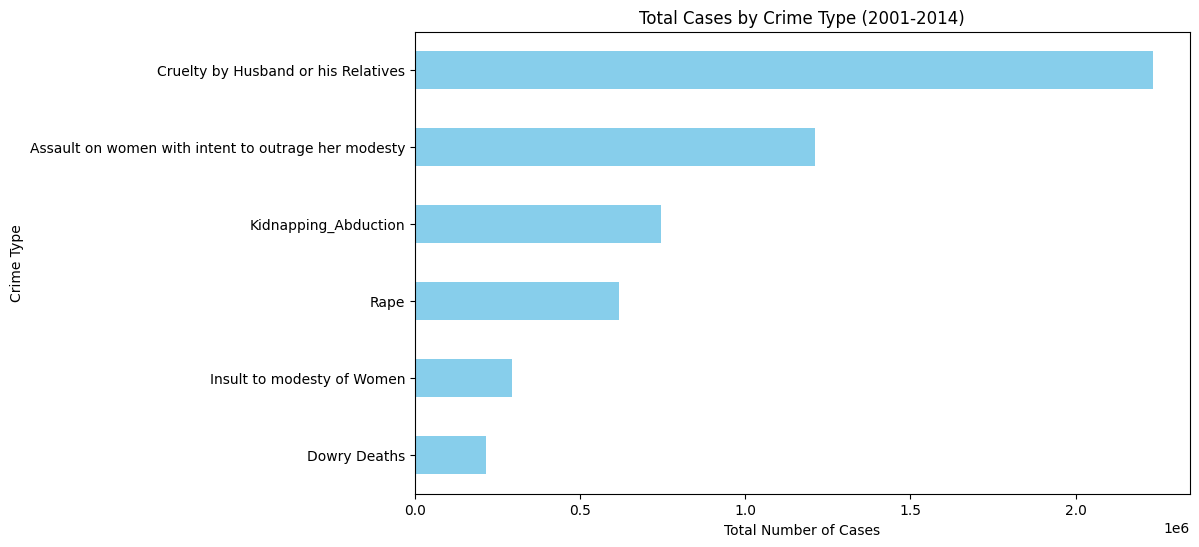

In [7]:
crime_types = ['Rape', 'Kidnapping_Abduction', 'Dowry Deaths',
               'Assault on women with intent to outrage her modesty',
               'Insult to modesty of Women', 'Cruelty by Husband or his Relatives']

crime_data = data[crime_types].sum().sort_values()
plt.figure(figsize=(10, 6))
crime_data.plot(kind='barh', color='skyblue')
plt.title("Total Cases by Crime Type (2001-2014)")
plt.xlabel("Total Number of Cases")
plt.ylabel("Crime Type")
plt.show()


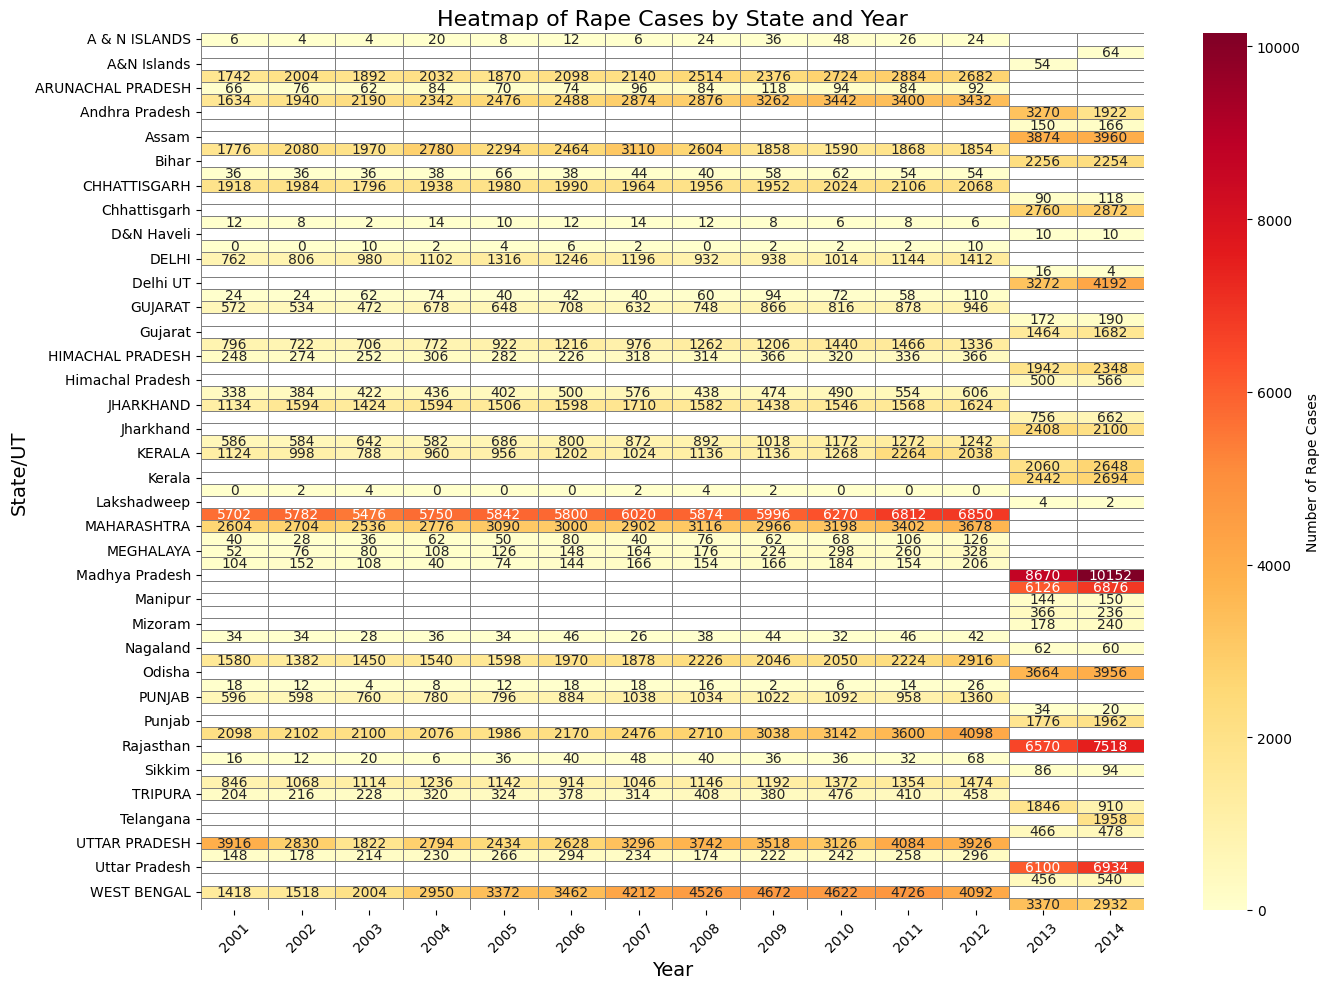

In [9]:

# Aggregate data by state and year for rape cases
state_year_data = data.pivot_table(values='Rape', index='STATE/UT', columns='Year', aggfunc='sum')

# Set the size of the figure
plt.figure(figsize=(14, 10))

# Create the heatmap
heatmap = sns.heatmap(state_year_data,
                      cmap='YlOrRd',
                      annot=True,
                      fmt=".0f",
                      linewidths=0.5,
                      linecolor='gray',
                      cbar_kws={'label': 'Number of Rape Cases'})

# Adding labels and title
plt.title("Heatmap of Rape Cases by State and Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("State/UT", fontsize=14)

# Adjust the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [11]:
#MODEL CREATION
#Forecasting Future Crime Trends
from statsmodels.tsa.arima.model import ARIMA

# Select data for a specific state, e.g., Andhra Pradesh, and specific crime type
state_data = data[data['STATE/UT'] == 'ANDHRA PRADESH']
rape_cases = state_data.groupby('Year')['Rape'].sum()

# Fit an ARIMA model (experiment with p, d, q values for better results)
model = ARIMA(rape_cases, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)  # Forecast for next 5 years
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


12    2698.901510
13    2684.943084
14    2696.470909
15    2686.950441
16    2694.813096
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


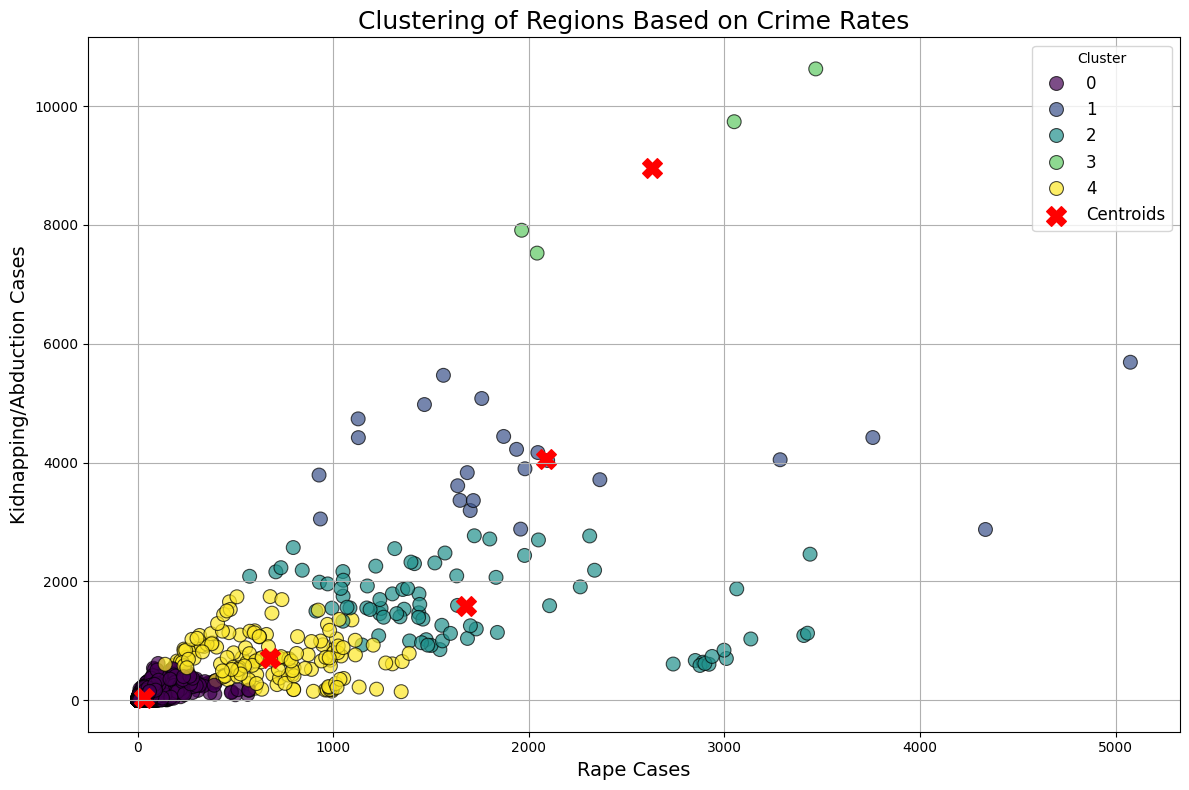

In [14]:
# Identifying Crime Hotspots with K-means Clustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Select columns for clustering
clustering_data = data[['Rape', 'Kidnapping_Abduction', 'Dowry Deaths']]

# Apply KMeans clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(clustering_data)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids for plotting
centroid_df = pd.DataFrame(centroids, columns=['Rape', 'Kidnapping_Abduction', 'Dowry Deaths'])

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rape', y='Kidnapping_Abduction', hue='Cluster', data=data,
                palette='viridis', s=100, alpha=0.7, edgecolor='k')

# Plot centroids (only using the features plotted)
plt.scatter(centroid_df['Rape'], centroid_df['Kidnapping_Abduction'],
            c='red', s=200, marker='X', label='Centroids')

# Improve plot aesthetics
plt.title("Clustering of Regions Based on Crime Rates", fontsize=18)
plt.xlabel("Rape Cases", fontsize=14)
plt.ylabel("Kidnapping/Abduction Cases", fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()




Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       246

    accuracy                           1.00      3204
   macro avg       1.00      1.00      1.00      3204
weighted avg       1.00      1.00      1.00      3204



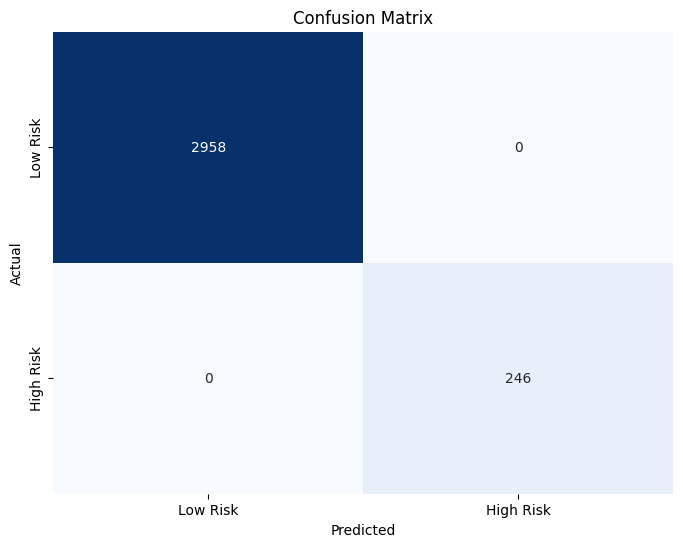

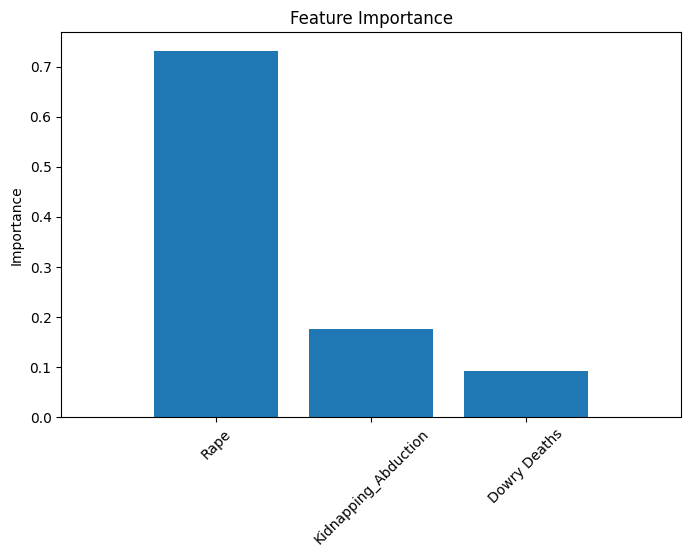

In [16]:
#Classification Model to Predict High-Risk Areas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Label regions as high-risk if cases exceed a threshold (example threshold: 100 cases of rape)
data['High_Risk'] = np.where(data['Rape'] > 100, 1, 0)

# Define features and target
X = data[['Rape', 'Kidnapping_Abduction', 'Dowry Deaths']]
y = data['High_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.show()

